In [2]:
import matplotlib.pyplot as plt
size=25
parameters = {'axes.labelsize': size, 'axes.titlesize': size, 'figure.titlesize': size,
              'xtick.labelsize': size, 'ytick.labelsize': size, 'legend.fontsize': 15,
              'legend.title_fontsize': 15, 'figure.figsize':(12,4)}
plt.rcParams.update(parameters)
import numpy as np
import pandas as pd
import tensorflow as tf
import h5py
import time
from matplotlib.animation import FuncAnimation, ArtistAnimation
import pywt

import MEArec as mr
import MEAutility
import spikeinterface as si
import spikeinterface.sorters as ss
import spikeinterface.extractors as se
import spikeinterface.comparison as sc
import spikeinterface.sorters as ssort
import spikeinterface.toolkit as st
import spikeinterface.widgets as sw




In [3]:
path = 'data/MEA100*100/recgen.h5'
#path = 'data/MEA10*10/recgen_cell_10/0.h5'
with h5py.File(path,'r') as f:
    print(list(f.keys()))

['channel_positions', 'info', 'original_templates', 'recordings', 'spike_traces', 'spiketrains', 'template_celltypes', 'template_ids', 'template_locations', 'template_rotations', 'templates', 'timestamps', 'voltage_peaks']


In [4]:
class generator:
    def __init__(self, file):
        self.file = file

    def __call__(self):
        with h5py.File(self.file, 'r') as hf:
            for im in hf['recordings']:
                yield im

In [5]:
ds = tf.data.Dataset.from_generator(generator(path),
                                    output_types=(tf.float32),
                                    output_shapes=(tf.TensorShape((None,))))


2022-05-15 17:51:08.906090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-15 17:51:08.906121: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-15 17:51:08.906139: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bs-hierlemann11.ethz.ch): /proc/driver/nvidia/version does not exist
2022-05-15 17:51:08.906574: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Video plot

In [ ]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [6,6]
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for e in ds.take(500):
    v= e.numpy().reshape(100,100)
    im = plt.imshow(abs(v), animated=True)
    ims.append([im])

ani = ArtistAnimation(fig, ims, interval=10, blit=True,
                                repeat_delay=10)

ani.save('cplot_original.gif')

In [8]:
recording, gt = se.read_mearec('data/MEA100*100/recgen.h5')
#recording, gt = se.read_mearec('data/MEA10*10/recgen_cell_10/1.h5')

In [9]:
# start = time.time()
# sorting_KS3 = ss.run_ironclust(recording=recording, n_jobs_bin=30, output_folder='tmp_ks')
# end = time.time()
# print('run_time(min): ',(end - start)/3600)

RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptj4n36rvv/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscript50iri8w1/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscript857_jgf4/script.sh
RUNNING SHELL SCRIPT: tmp_ks/run_ironclust.sh
run_time(min):  10.90541232638889


In [12]:
# sorting_KS3.save(folder='data/MEA100*100/sorting_KS3')

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/spikeinterface/core/basesorting.py:118: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


NpzSortingExtractor: 501 units - 1 segments - 32.0kHz
  file_path: /home/eazizi/data/MEA100*100/sorting_KS3/sorting_cached.npz

In [9]:
sorting_KS3_cached = si.load_extractor('data/MEA100*100/sorting_KS3')

In [10]:
comparison_gt = sc.compare_sorter_to_ground_truth(tested_sorting=sorting_KS3_cached, gt_sorting=gt, exhaustive_gt=True)

PERFORMANCE (pooled_with_average)
-----------
ACCURACY: 74.10942359640602
RECALL: 75.13067593999611
PRECISION: 82.83134869069933
FALSE DISCOVERY RATE: 1.1686513093006552
MISS RATE: 8.869324060003905

SUMMARY
-------
GT num_units: 300
TESTED num_units: 501
num_well_detected: 189
num_redundant: 85
num_overmerged: 1
num_false_positive_units 135
num_bad: 249



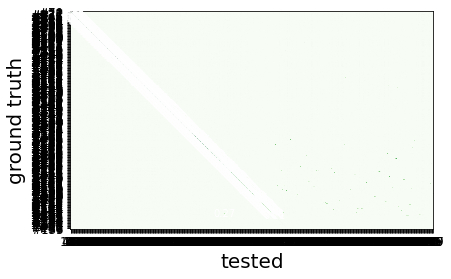

In [11]:
comparison_gt.print_performance()
comparison_gt.print_summary()
sw.plot_agreement_matrix(comparison_gt)

/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/links/groups/hierlemann/spikesorting/miniconda3/envs/eazizi/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 82.3% of the points cannot be placed; you may want to decre

<AxesSubplot:title={'center':'recording ( one channel)'}, xlabel='measurement', ylabel='value'>

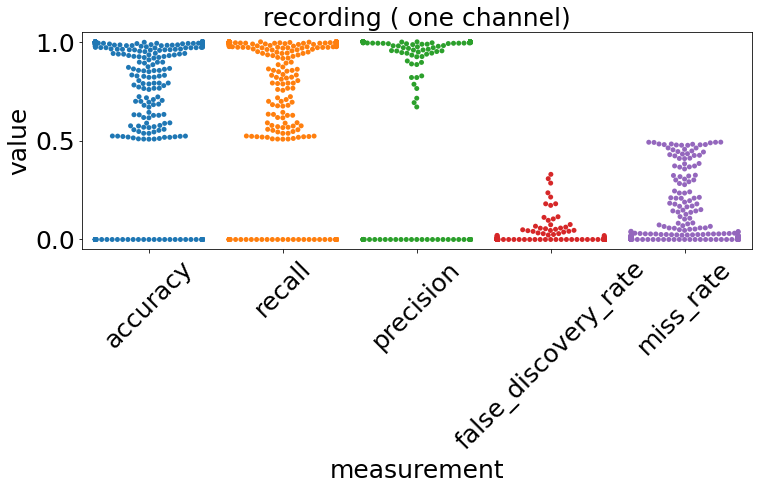

In [12]:
perf_IC = comparison_gt.get_performance()
s = perf_IC
perf2 = pd.melt(perf_IC, var_name='measurement')
plt.xticks(rotation=45)
plt.xlabel('frequency')
plt.ylabel('values')
plt.title('recording ( one channel)')
sns.swarmplot(data=perf2, x='measurement', y='value')

In [15]:
we = si.extract_waveforms(recording, sorting_KS3_cached, folder='tmp_ks', overwrite=True, chunk_size=recording.get_num_samples()//100, progress_bar=True, n_jobs=30)

extract waveforms: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:00:48<00:00, 36.49s/it]


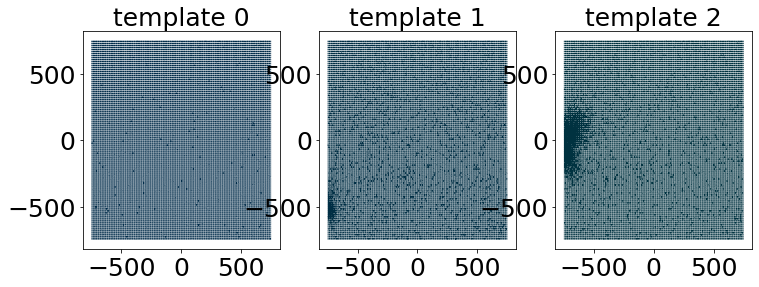

In [16]:
unit_ids = sorting_KS3_cached.unit_ids[:3]
sw.plot_unit_templates(we, unit_ids=unit_ids, ncols=3)

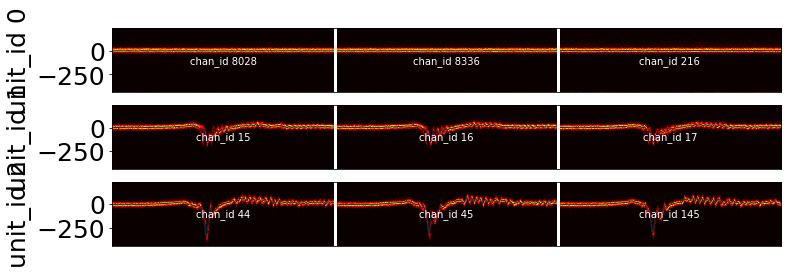

In [24]:
sw.plot_unit_waveform_density_map(we, unit_ids=unit_ids, max_channels=3)

In [20]:
qm = st.compute_quality_metrics(we, metric_names=['snr', 'isi_violation', 'firing_rate'])
qm

,snr,isi_violations_ratio,isi_violations_rate,isi_violations_count,firing_rate
0,0.002529,0.008787,37933.850000,2276031,37933.866667
1,8.118273,0.000000,0.000000,0,4.666667
2,18.034906,0.000000,0.000000,0,5.083333
3,19.450579,0.000000,0.000000,0,1.666667
4,19.469801,0.000000,0.000000,0,2.816667
...,...,...,...,...,...
496,1.298823,7.689350,0.266667,16,3.400000
497,22.662525,0.000000,0.000000,0,1.633333
498,19.643751,0.000000,0.000000,0,2.816667
499,18.027020,0.000000,0.000000,0,1.100000


In [21]:
# qm.to_csv('data/MEA100*100/quality_metric.csv')

In [22]:
d_qm= pd.read_csv('data/MEA100*100/quality_metric.csv')

In [23]:
d_qm

,Unnamed: 0,snr,isi_violations_ratio,isi_violations_rate,isi_violations_count,firing_rate
0,0,0.002529,0.008787,37933.850000,2276031,37933.866667
1,1,8.118273,0.000000,0.000000,0,4.666667
2,2,18.034906,0.000000,0.000000,0,5.083333
3,3,19.450579,0.000000,0.000000,0,1.666667
4,4,19.469800,0.000000,0.000000,0,2.816667
...,...,...,...,...,...,...
496,496,1.298823,7.689350,0.266667,16,3.400000
497,497,22.662525,0.000000,0.000000,0,1.633333
498,498,19.643751,0.000000,0.000000,0,2.816667
499,499,18.027020,0.000000,0.000000,0,1.100000
